# TP1 de MCS

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange

## Partie I

In [45]:
def DTW(w0, w1, w2, seq1, seq2, d):
  I, J = seq2.shape[0], seq1.shape[0]
  
  g = np.empty((I+1,J+1))
  g.fill(None)
  
  g[0][0] = 0
  
  
  for j in range(1,J+1):
    g[0][j] = np.Infinity
  
  for i in range(1,I+1):
    g[i][0] = np.Infinity

    for j in range(1,J+1):
       g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)

  
  #print(g)
  score = g[I][J]/(I+J)
  #print(f'score: {score}')
  
  return score 

Définition des fonctions de distance

In [46]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [47]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

1.0

Test avec l'exemple de l'exercice **2.1**

In [48]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

3.6

Test avec l'exemple de l'exercice **2.2**

In [49]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

0.16666666666666666

Test avec l'exemple de l'exercice **2.3**

In [50]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [51]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

0.25 1.0 0.7
Le mot 'cinq' est donc reconnu


*Question 2.*

In [52]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

0.6 0.6153846153846154 0.6153846153846154
En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score


## Partie II

In [53]:
import librosa

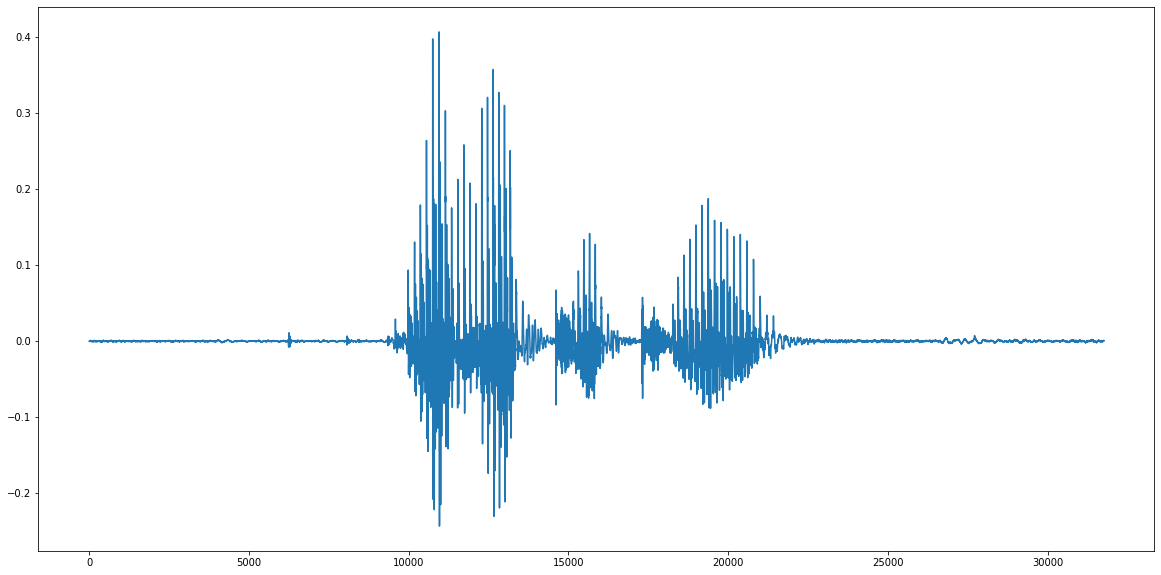

In [86]:
m1, sr_m1 = librosa.load("corpus/dronevolant_nonbruite/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus/dronevolant_nonbruite/F01_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [55]:
print(mfcc_m1)

[[-5.82703247e+02 -5.84441101e+02 -5.94360962e+02 -5.98286804e+02
  -6.01296265e+02 -6.10077881e+02 -5.15813538e+02 -6.00719849e+02
  -5.46653015e+02 -4.33107391e+02 -2.59153839e+02 -2.06453094e+02
  -2.26242035e+02 -2.54904831e+02 -3.27343536e+02 -2.75069580e+02
  -3.66151062e+02 -3.30313721e+02 -3.05727905e+02 -3.27276093e+02
  -3.36625549e+02 -4.13930176e+02 -5.13463440e+02 -5.42615479e+02
  -5.36260132e+02 -5.51331116e+02 -5.59995850e+02 -5.49711365e+02
  -5.71249329e+02 -5.75309570e+02 -5.53500610e+02 -5.61090149e+02]
 [ 9.14449768e+01  9.78501282e+01  9.16450958e+01  9.35301971e+01
   1.00156937e+02  9.64385147e+01  5.15577850e+01  9.26189270e+01
   6.32244263e+01  1.31172058e+02  2.00667114e+02  1.83460266e+02
   1.89353668e+02  1.93775558e+02  8.64663544e+01  1.33972977e+02
   1.41400330e+02  5.32687492e+01  1.64746841e+02  2.08834335e+02
   2.01209793e+02  1.79474777e+02  1.27404526e+02  9.86358795e+01
   8.70318298e+01  8.79614563e+01  1.05165230e+02  1.09768906e+02
   1.0632

In [56]:
print(mfcc_f1)

[[-6.02568848e+02 -5.91266602e+02 -6.30422607e+02 -6.46613037e+02
  -6.37142639e+02 -6.37689087e+02 -6.39994751e+02 -5.55466980e+02
  -5.94212219e+02 -5.59685303e+02 -4.49246277e+02 -2.41313873e+02
  -2.07182587e+02 -2.01665634e+02 -2.57922150e+02 -2.33031952e+02
  -2.40259415e+02 -4.04098480e+02 -2.99308868e+02 -2.97825562e+02
  -3.47568970e+02 -3.60120056e+02 -3.15327698e+02 -3.63239807e+02
  -2.85519318e+02 -2.55848877e+02 -3.00502991e+02 -3.94900757e+02
  -4.24153748e+02 -4.45599060e+02 -4.76202515e+02 -5.13023315e+02
  -5.36672607e+02 -5.58440308e+02 -5.71529419e+02 -5.94083130e+02
  -5.83995972e+02 -5.88043640e+02 -6.19254639e+02]
 [ 7.84028778e+01  6.92165070e+01  6.26591644e+01  6.21968079e+01
   6.99450150e+01  7.07553558e+01  6.78752747e+01  5.23285370e+01
   4.59454651e+01  2.53440933e+01  9.17251129e+01  1.09769943e+02
   8.25562897e+01  9.38121109e+01  1.09518829e+02  6.31089745e+01
   8.93754425e+01  1.19636162e+02  5.74385834e+01  7.75280075e+01
   1.15186035e+02  4.2763

In [57]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

75.90145514044963

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [59]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,2)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test}

#### Fonction de génération du chemin d'un fichier (Linux)

In [60]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
        
    chemin += f"/{ID}_{action}.wav"
    
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [61]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

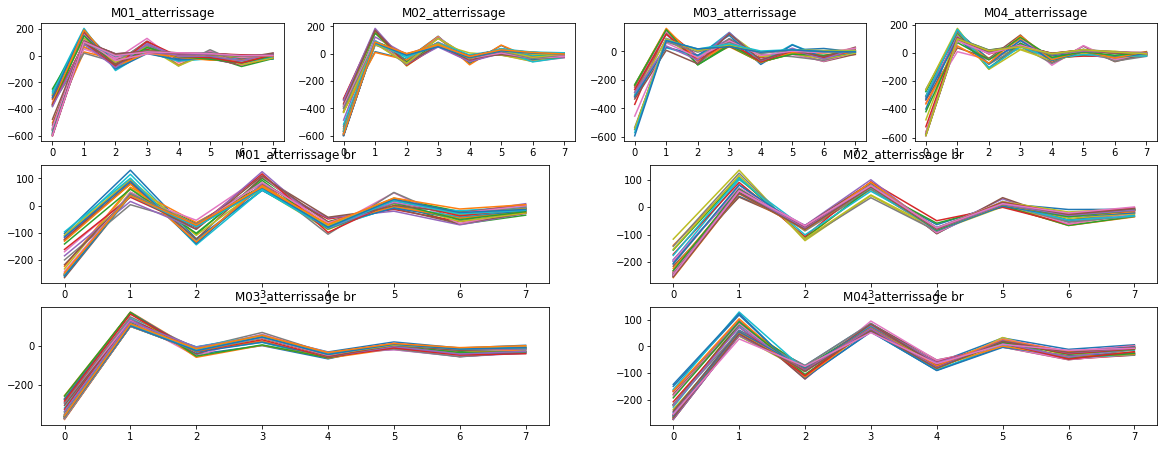

In [66]:
for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(4,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(4,len(IDs["bruite"])/2, (i+len(IDs["bruite"])/2+1))
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

In [ ]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        
        
        plt.subplot(2,len(IDs)/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [80]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0

    for typeSon in IDs:
        for ID in IDs[typeSon]:
            for action in actions:
                filename = gen_path(typeSon, ID, action)
                if filename != action_to_find:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {action} ({ID})" 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)))


    results.sort(key=lambda k:k[1])

    for i, (action, result) in enumerate(results):
        print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
    print()

    print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')


In [81]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus/dronevolant_nonbruite/F03_etatdurgence.wav

1:	nonbruite tournedroite (F03)	|	47.38834099597241
2:	nonbruite plusbas (F03)     	|	54.05058161034641
3:	nonbruite gauche (F03)      	|	54.70951822671023
4:	nonbruite plushaut (F05)    	|	55.51190053499662
5:	nonbruite faisunflip (F03)  	|	55.57747762853449
6:	nonbruite decollage (M13)   	|	57.59267354565998
7:	nonbruite droite (M04)      	|	57.67968338557652
8:	nonbruite plusbas (M05)     	|	58.462900314802006
9:	nonbruite etatdurgence (M09)	|	58.75875729780931
10:	nonbruite droite (F03)      	|	58.865344524383545
11:	nonbruite tournedroite (M09)	|	59.21781605237151
12:	nonbruite tournedroite (F05)	|	59.97523289510649
13:	nonbruite plushaut (M13)    	|	60.0323557364635
14:	nonbruite plushaut (F04)    	|	60.18259065801447
15:	nonbruite avance (M06)      	|	60.538183657922474
16:	nonbruite plushaut (F03)    	|	60.551832010716566
17:	nonbruite tournedroite (M10)	|	60.73567636622939
18:	nonbruite etatdurgence (M01)	|	61.44542420940635
1

### Test avec le corpus de voix perso

In [83]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus_test/M01_gauche.wav

1:	test decollage (M01)        	|	57.802485184236005
2:	test atterrissage (M01)     	|	76.04319286346436
3:	test recule (M01)           	|	77.3624600497159
4:	test tournegauche (M01)     	|	78.5256275697188
5:	nonbruite recule (M10)      	|	78.94356151989528
6:	nonbruite decollage (M05)   	|	79.91470442877875
7:	test faisunflip (M01)       	|	79.96560551903464
8:	nonbruite decollage (M12)   	|	80.80962940057118
9:	nonbruite recule (M12)      	|	81.07780425889152
10:	nonbruite droite (M12)      	|	82.59198877366923
11:	nonbruite gauche (M05)      	|	83.46078470018175
12:	nonbruite recule (F03)      	|	83.88421090443929
13:	test droite (M01)           	|	84.23029856248336
14:	nonbruite plusbas (M12)     	|	85.18652991895323
15:	nonbruite gauche (M12)      	|	86.55584270671262
16:	test plusbas (M01)          	|	87.26049908724698
17:	nonbruite gauche (M01)      	|	87.4403981809263
18:	nonbruite gauche (M07)      	|	87.90214538574219
19:	nonbruite gauche (M10)   